<a href="https://www.kaggle.com/code/yahyasoker/hate-speech-detection?scriptVersionId=155381825" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
!pip install nltk


In [2]:
# Import necessary libraries
import pandas as pd  # Pandas for data manipulation
import numpy as np  # NumPy for numerical operations
import seaborn as sns  # Seaborn for statistical data visualization
import matplotlib.pyplot as plt  # Matplotlib for creating plots
import pandas as pd  # Importing Pandas again (not necessary, already imported)
import nltk  # Natural Language Toolkit for natural language processing
import re  # Regular expression library for pattern matching
from nltk.tokenize import word_tokenize  # Tokenization from NLTK
import warnings  # To suppress any warnings during execution
warnings.filterwarnings("ignore")  # Ignore warnings during execution

# Download the punkt tokenizer (if not already downloaded)
nltk.download('punkt')  # Download the punkt tokenizer from NLTK


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
# Read the CSV file into a Pandas DataFrame
df = pd.read_csv('/kaggle/input/hate-speech-and-offensive-language-detection/train.csv')

In [4]:
# Display the first few rows of the DataFrame to get a quick overview of the data
df.head()

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [5]:
# Display concise summary information about the DataFrame, including data types and missing values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   count                     24783 non-null  int64 
 1   hate_speech_count         24783 non-null  int64 
 2   offensive_language_count  24783 non-null  int64 
 3   neither_count             24783 non-null  int64 
 4   class                     24783 non-null  int64 
 5   tweet                     24783 non-null  object
dtypes: int64(5), object(1)
memory usage: 1.1+ MB


In [6]:
# Check for missing values in each column of the DataFrame and sum them up
missing_values = df.isnull().sum()

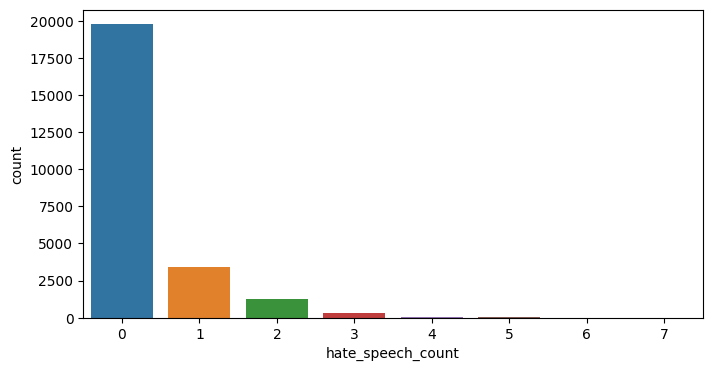

In [7]:
# Set the size of the figure for the plot
plt.figure(figsize=(8, 4))

# Create a countplot using Seaborn to visualize the distribution of 'hate_speech_count'
sns.countplot(x='hate_speech_count', data=df)

# Display the plot
plt.show()


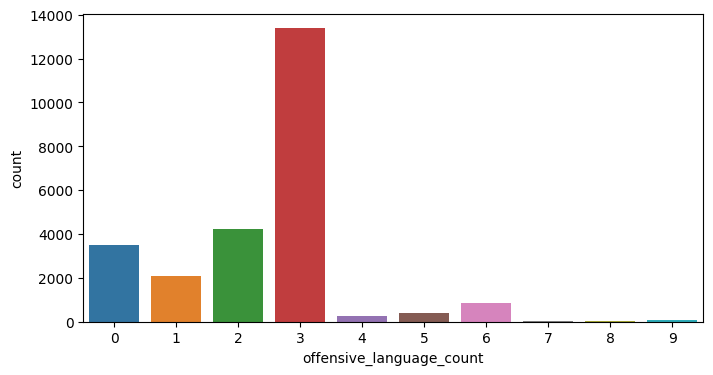

In [8]:
# Set the size of the figure for the plot
plt.figure(figsize=(8, 4))

# Create a countplot using Seaborn to visualize the distribution of 'offensive_language_count'
sns.countplot(x='offensive_language_count', data=df)

# Display the plot
plt.show()


In [9]:
tweets = df['tweet']

In [10]:
# Extract the 'tweet' column from the DataFrame
tweets = df['tweet']

# Import the stopwords from the NLTK library
from nltk.corpus import stopwords

# Download the stopwords dataset from NLTK
nltk.download('stopwords')

# Create a set of English stopwords
stop_words = set(stopwords.words('english'))

# Define a function to clean a tweet
def clean_tweet(tweet):
    # Remove RT (Retweet)
    tweet = re.sub(r'\brt\b', '', tweet, flags=re.IGNORECASE)
    
    # Remove URLs
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)
    
    # Remove mentions (e.g., @username)
    tweet = re.sub(r'@\w+', '', tweet)
    
    # Remove special characters and numbers, keep only letters
    tweet = re.sub(r'[^a-zA-Z\s]', '', tweet)
    
    # Convert to lowercase
    tweet = tweet.lower()
    
    # Remove stopwords
    tweet = ' '.join([word for word in tweet.split() if word not in stop_words])
    
    return tweet

# Call the cleaning function on the 'tweets' column
cleaned_tweets = tweets.apply(clean_tweet)


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
print(cleaned_tweets)

0        woman shouldnt complain cleaning house amp man...
1        boy dats coldtyga dwn bad cuffin dat hoe st place
2             dawg ever fuck bitch start cry confused shit
3                                         look like tranny
4           shit hear might true might faker bitch told ya
                               ...                        
24778    yous muthafin lie right tl trash mine bible sc...
24779    youve gone broke wrong heart baby drove rednec...
24780    young buck wanna eat dat nigguh like aint fuck...
24781                    youu got wild bitches tellin lies
24782    ruffled ntac eileen dahlia beautiful color com...
Name: tweet, Length: 24783, dtype: object


In [12]:
labels = list(df['class'])

In [13]:
# Import the train_test_split function from scikit-learn
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
# 'cleaned_tweets' is the feature (X), and 'labels' is the target variable (y)
# test_size=0.2 means that 20% of the data will be used for testing, and 80% for training
# random_state=42 ensures reproducibility of the split
x_train, x_test, y_train, y_test = train_test_split(cleaned_tweets, labels, test_size=0.2, random_state=42)


In [14]:
# Import the Tokenizer class from Keras
from keras.preprocessing.text import Tokenizer

# Initialize the tokenizer
tokenizer = Tokenizer()

# Build the vocabulary based on the training dataset
tokenizer.fit_on_texts(x_train)

# Tokenize the training and test datasets
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

# Vocabulary size (number of unique words) -> will be used in the embedding layer
vocab_size = len(tokenizer.word_index) + 1


In [15]:
# Import the pad_sequences function from Keras
from keras.preprocessing.sequence import pad_sequences

# Find the maximum length of sequences in the training set
max_length = max(len(seq) for seq in x_train)

# Check for outliers in the test set and print any sequences that exceed the maximum length
for x in x_test:
    if len(x) > max_length:
        print(f"An outlier detected: {x}")

# Pad sequences to have a uniform length (max_length)
x_train = pad_sequences(x_train, maxlen=max_length)
x_test = pad_sequences(x_test, maxlen=max_length)


In [16]:
# Import the to_categorical function from Keras utils
from keras.utils import to_categorical

# Convert the categorical labels to one-hot encoded format for both training and testing sets
# 'num_classes=3' indicates the number of classes in the classification task
y_test = to_categorical(y_test, num_classes=3)
y_train = to_categorical(y_train, num_classes=3)


In [17]:
from keras import backend as K
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense


# Simple recall function
def recall(y_true, y_pred):
    true_pos = K.sum(K.round(y_true * y_pred))
    pos_labels = K.sum(K.round(y_true))
    recall = true_pos / (pos_labels + K.epsilon())
    return recall

# Simple precision function
def precision(y_true, y_pred):
    true_pos = K.sum(K.round(y_true * y_pred))
    pred_pos = K.sum(K.round(y_pred))
    precision = true_pos / (pred_pos + K.epsilon())
    return precision

# Simple F1 score function using the above functions
def f1(y_true, y_pred):
    precisions = precision(y_true, y_pred)
    recalls = recall(y_true, y_pred)
    return 2 * (precisions * recalls) / (precisions + recalls + K.epsilon())

# Define output dimension
output_dim = 360

# Create LSTM model architecture (CNN + LSTM)
model = Sequential([
    Embedding(vocab_size, output_dim, input_length=max_length),
    LSTM(64, dropout=0.3, recurrent_dropout=0.3),
    Dropout(0.5),
    Dense(256, activation="relu"),
    Dropout(0.5),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(3, activation="softmax"),
])

# Compile the model with specified metrics
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', f1, precision, recall])

# checking the model parameters
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 25, 360)           6819120   
                                                                 
 lstm (LSTM)                 (None, 64)                108800    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 256)               16640     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0

In [18]:
# Train the model
model_history = model.fit(
    x_train,
    y_train,
    batch_size = 64,
    epochs=10,
    validation_data=(x_test, y_test)
)

Epoch 1/10
310/310 [==============================] - 58s 164ms/step - loss: 0.4505 - accuracy: 0.8411 - f1: 0.8238 - precision: 0.8588 - recall: 0.7980 - val_loss: 0.3291 - val_accuracy: 0.8850 - val_f1: 0.8846 - val_precision: 0.8993 - val_recall: 0.8707
Epoch 2/10
310/310 [==============================] - 33s 107ms/step - loss: 0.2410 - accuracy: 0.9184 - f1: 0.9183 - precision: 0.9273 - recall: 0.9097 - val_loss: 0.3181 - val_accuracy: 0.8880 - val_f1: 0.8865 - val_precision: 0.8979 - val_recall: 0.8755
Epoch 3/10
310/310 [==============================] - 32s 103ms/step - loss: 0.1505 - accuracy: 0.9462 - f1: 0.9455 - precision: 0.9493 - recall: 0.9418 - val_loss: 0.4184 - val_accuracy: 0.8812 - val_f1: 0.8813 - val_precision: 0.8851 - val_recall: 0.8775
Epoch 4/10
310/310 [==============================] - 31s 99ms/step - loss: 0.1029 - accuracy: 0.9638 - f1: 0.9638 - precision: 0.9652 - recall: 0.9625 - val_loss: 0.5296 - val_accuracy: 0.8701 - val_f1: 0.8701 - val_precision: 0

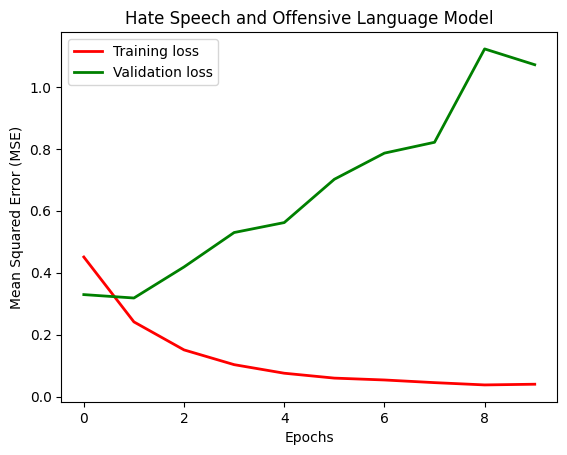

In [19]:
import matplotlib.pyplot as plt

# Access the training history of the model
hist = model.history.history

# Plot training loss in red and validation loss in green
plt.plot(hist['loss'], 'r', linewidth=2, label='Training loss')
plt.plot(hist['val_loss'], 'g', linewidth=2, label='Validation loss')

# Set plot title and labels
plt.title('Hate Speech and Offensive Language Model')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')

# Display legend
plt.legend()

# Show the plot
plt.show()

In [20]:
# Assume user_input is a string provided by the user
user_input = "i love this great video"

# Preprocess the user input
# ... (perform the same preprocessing as we did for the training data)
input_sequence = tokenizer.texts_to_sequences([user_input])
padded_input = pad_sequences(input_sequence, maxlen=max_length)
# Make predictions
predictions = model.predict(padded_input)

# Interpret the results (assuming a classification problem)
predicted_class = np.argmax(predictions)

# Print or use the predicted class
print(f"Predicted class: {predicted_class}")


1/1 [==============================] - 0s 301ms/step
Predicted class: 2
